In [202]:
import torch
import torchvision

tabu1 = []
tabu2 = []

n_epochs = 100
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [203]:

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('./data', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.FashionMNIST('./data', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                             ])),
  batch_size=batch_size_test, shuffle=True)

print(train_loader)
examples = enumerate(train_loader)
batch_idx, (example_data, example_targets) = next(examples)
print(example_data.shape)


torch.Size([64, 1, 28, 28])


In [183]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR100('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR100('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [184]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR10('./cifar10_dataset', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.49137255, 0.48235294, 0.44666667), (0.24705882, 0.24352941, 0.26156863))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.CIFAR10('./cifar10_dataset', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.49137255, 0.48235294, 0.44666667), (0.24705882, 0.24352941, 0.26156863))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [185]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.SVHN('./data', split='train', download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.SVHN('./data', split='test', download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                                torchvision.transforms.Normalize(
#                                  (0.1307,), (0.3081,))
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)


In [186]:

# train_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.MNIST('./data', train=True, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                              ])),
#   batch_size=batch_size_train, shuffle=True)

# test_loader = torch.utils.data.DataLoader(
#   torchvision.datasets.MNIST('./data', train=False, download=True,
#                              transform=torchvision.transforms.Compose([
#                                torchvision.transforms.ToTensor(),
#                              ])),
#   batch_size=batch_size_test, shuffle=True)

# print(train_loader)
# examples = enumerate(train_loader)
# batch_idx, (example_data, example_targets) = next(examples)
# print(example_data.shape)



torch.Size([64, 1, 28, 28])


In [204]:
train_size = int(0.8 * len(train_loader.dataset))
test_size = len(train_loader.dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(train_loader.dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size_train, 
                                           shuffle=True)
val_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size_test,
                                                shuffle=False)

In [205]:
mean = 0.
std = 0.
nb_samples = 0.
for data, _ in train_loader:
    batch_samples = data.size(0)
    data = data.view(batch_samples, data.size(1), -1)
    mean += data.mean(2).sum(0)
    std += data.std(2).sum(0)
    nb_samples += batch_samples

mean /= nb_samples
std /= nb_samples

train_loader.dataset.transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 mean, std)
                             ])
test_loader.dataset.transform = torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 mean, std)
                             ])

print(mean)
print(std)

tensor([0.2863])
tensor([0.3206])


In [206]:
def initMatrix(size, append_with):
    ary = []
    for i in range(0, size):
        ary.append(append_with)
    return ary


In [207]:
tabu1 = initMatrix(1024, 1)
tabu2 = initMatrix(1024, 1)

layer1_dropout = 0.5
layer2_dropout = 0.5

layer1_diff = 1.0-layer1_dropout
layer2_diff = 1.0-layer2_dropout

#tabu3 = initMatrix(512)

In [208]:
from torch.nn.modules import Module
from torch.nn import functional as F
from torch._jit_internal import weak_module, weak_script_method

class Dropout(Module):
    def __init__(self, p=0.5, inplace=False):
        super(Dropout, self).__init__()
        if p < 0 or p > 1:
            raise ValueError("dropout probability has to be between 0 and 1, "
                             "but got {}".format(p))
        self.p = p
        self.inplace = inplace
        print("Updated Dropout: " + str(p))

    def forward(self, input):
        varTemp = F.dropout(input, self.p, self.training, self.inplace)
        return varTemp

    def __repr__(self):
        inplace_str = ', inplace' if self.inplace else ''
        return self.__class__.__name__ + '(' \
            + 'p=' + str(self.p) \
            + inplace_str + ')'
      
class MyLinear(torch.nn.Linear):
    def __init__(self, in_feats, out_feats, drop_p, t, bias=True):
        super(MyLinear, self).__init__(in_feats, out_feats, bias=bias)
        self.masker = Dropout(p=drop_p)
        self.tabu = t
        self.firstItr = True
        self.historial_tabu_count = initMatrix(4096, 0)

    def forward(self, input):
       
        masked_weight = self.masker(self.weight)
        output = F.linear(input, masked_weight, self.bias)
        
        if self.firstItr == True:
            
            self.firstItr = False
            for i in range(0, len(output[0])):
                if output[0][i] < 0:
                    # Neuron will be dropped
                    self.tabu[i] = 0
        else:
            
            temp_tabu = initMatrix(len(output[0]), 1)
            
            for i in range(0, len(output[0])):
                if output[0][i] < 0:
                    # Neuron will be dropped
                    temp_tabu[i] = 0

            for i in range(0, len(output[0])):
                if (self.tabu[i] == 0 and temp_tabu[i] == 0):
                    # Neuron will be dropped
                    self.historial_tabu_count[i] = self.historial_tabu_count[i] + 1
                    
                    if self.historial_tabu_count[i] > 2:
                        self.tabu[i] = 1
                        output[0][i] = input[0][i]
                        self.historial_tabu_count[i] = 0
                    else:
                        self.tabu[i] = temp_tabu[i]

        return output
    
    def updateCurrentDropout(self, m):
        tempM = '{:.2f}'.format(m)
        self.masker = Dropout(p=float(tempM))  
        


In [209]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
       
        # define the layers and their sizes, turn off bias
        
        self.fc1 = nn.Linear(784, 1024)
       
        self.aD1 = MyLinear(1024, 1024, layer1_dropout, tabu1) #nn.Dropout(0.5) # # #      
        
        #self.d2 = nn.Dropout(0.5)
        #self.aD2 = MyLinear(1024, 1024, layer2_dropout, tabu2) 
        #self.fc2 = nn.Linear(1024, 1024)
        #self.d2 = Dropout(0.5) 
        #self.fc3 = nn.Linear(1024, 1024)
        
        #For CIFAR-10
        #self.d3 = Dropout(0.3) 
        #self.fc3_1 = nn.Linear(512, 256)
        
        self.fc4 = nn.Linear(1024, 10)
        

    def forward(self, x):
        x = x.view(-1, 784)
        
        x = F.relu(self.fc1(x))
        x = F.relu(self.aD1(x))
        #x = F.relu(self.dT(x))
        #x = F.relu(self.aD2(x))
        
        #x = F.relu(self.d2(x))
        #x = F.relu(self.fc3(x))
        
        # for CIFAR-10
        #x = F.relu(self.d3(x))
        #x = F.relu(self.fc3_1(x))
        x = self.fc4(x)
        return F.log_softmax(x)
      
    def updateDropout(self, m):
        self.aD1.updateCurrentDropout(m)
        #self.aD2.updateCurrentDropout(m)

In [210]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate)

Updated Dropout: 0.5


In [211]:
avg_train_loss = []
avg_train_counter = []
avg_test_loss = []
avg_test_counter = []
test_accuracy_list = []

test_losses = []
test_counter = []

epoch_number = 0
train_avg_loss = 0
test_avg_loss = 0

In [212]:
# 0 means negative
# 1 means positive
loss_type = 0
previous_loss = 100.0
sign_manipulator = 1

pos_inc = 0
neg_inc = 0

In [213]:
def train(epoch, layer1_dropout):
  
    train_losses = []
    train_counter = []
    
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = network(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append((batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
            #torch.save(network.state_dict(), './results/cifar10_with_adaptive_model.pth')
            #torch.save(optimizer.state_dict(), './results/cifar10_with_adaptive_optimizer.pth')
            #test(epoch, False)
            
    sum = 0.0
    for loss in train_losses:
        sum = sum + loss
    
    current_loss = sum / len(train_losses)
    
    avg_train_loss.append(current_loss)
    network.updateDropout(layer1_dropout)
    return current_loss

In [214]:
def test(epoch):
    network.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in val_loader:
        #iterator = iter(test_loader)
        #data, target= iterator.next() 
        
            examples = enumerate(val_loader)
            batch_idx, (example_data, example_targets) = next(examples)  
            output = network(data)
            test_loss += F.nll_loss(output, target, size_average=False).item()
            pred = output.data.max(1, keepdim=True)[1]
            correct += pred.eq(target.data.view_as(pred)).sum()

    test_loss /= len(val_loader.dataset)
    avg_test_loss.append(test_loss)
    test_counter.append((batch_idx*64) + ((epoch-1)*len(val_loader.dataset)))
    test_accuracy_list.append(100. * correct / len(val_loader.dataset))
    
    print('Test set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(val_loader.dataset),
        100. * correct / len(val_loader.dataset)))
   

In [215]:

def getDropout(layer_diff, current_dropout):
    temp_div = 0.05
    return temp_div

for epoch in range(1, n_epochs + 1):
                            
    if (layer1_dropout < 0.1 or layer1_dropout > 0.9):
        if layer1_dropout < 0.1:
            sign_manipulator = -1
            layer1_dropout = 0.5
        elif layer1_dropout > 0.9:
            sign_manipulator = 1
            layer1_dropout = 0.5
       
    layer1_dropout = abs(layer1_dropout - (sign_manipulator * getDropout(layer1_diff, layer1_dropout)))
    
    
    current_l = train(epoch, abs(layer1_dropout))
    test(epoch)
      
    if (current_l > previous_loss) :
                
        if loss_type == 0:
            sign_manipulator = 1
            print("Reducing")
            neg_inc = neg_inc + 1
            
            if neg_inc > 2:
                loss_type = 1
                neg_inc = 0
        else:
            sign_manipulator = -1
            print("Increasing")
            pos_inc = pos_inc + 1
            if pos_inc > 2:
                loss_type = 0
                pos_inc = 0
        
    else:
        previous_loss = current_l
        print("Default")
      
    
              

/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 1 [0/48000 (0%)]	Loss: 2.312541
Train Epoch: 1 [640/48000 (1%)]	Loss: 2.270741
Train Epoch: 1 [1280/48000 (3%)]	Loss: 2.234345
Train Epoch: 1 [1920/48000 (4%)]	Loss: 2.226981
Train Epoch: 1 [2560/48000 (5%)]	Loss: 2.237744
Train Epoch: 1 [3200/48000 (7%)]	Loss: 2.234267
Train Epoch: 1 [3840/48000 (8%)]	Loss: 2.190435
Train Epoch: 1 [4480/48000 (9%)]	Loss: 2.156034
Train Epoch: 1 [5120/48000 (11%)]	Loss: 2.123987
Train Epoch: 1 [5760/48000 (12%)]	Loss: 2.144196
Train Epoch: 1 [6400/48000 (13%)]	Loss: 2.132860
Train Epoch: 1 [7040/48000 (15%)]	Loss: 2.091608
Train Epoch: 1 [7680/48000 (16%)]	Loss: 2.075523
Train Epoch: 1 [8320/48000 (17%)]	Loss: 2.089596
Train Epoch: 1 [8960/48000 (19%)]	Loss: 1.943806
Train Epoch: 1 [9600/48000 (20%)]	Loss: 2.036379
Train Epoch: 1 [10240/48000 (21%)]	Loss: 1.934219
Train Epoch: 1 [10880/48000 (23%)]	Loss: 1.962735
Train Epoch: 1 [11520/48000 (24%)]	Loss: 1.899655
Train Epoch: 1 [12160/48000 (25%)]	Loss: 1.842712
Train Epoch: 1 [12800/48000 

Train Epoch: 3 [7680/48000 (16%)]	Loss: 0.399560
Train Epoch: 3 [8320/48000 (17%)]	Loss: 0.716736
Train Epoch: 3 [8960/48000 (19%)]	Loss: 0.637423
Train Epoch: 3 [9600/48000 (20%)]	Loss: 0.568387
Train Epoch: 3 [10240/48000 (21%)]	Loss: 0.525350
Train Epoch: 3 [10880/48000 (23%)]	Loss: 0.573528
Train Epoch: 3 [11520/48000 (24%)]	Loss: 0.671321
Train Epoch: 3 [12160/48000 (25%)]	Loss: 0.568676
Train Epoch: 3 [12800/48000 (27%)]	Loss: 0.495184
Train Epoch: 3 [13440/48000 (28%)]	Loss: 0.585380
Train Epoch: 3 [14080/48000 (29%)]	Loss: 0.577256
Train Epoch: 3 [14720/48000 (31%)]	Loss: 0.500448
Train Epoch: 3 [15360/48000 (32%)]	Loss: 0.623424
Train Epoch: 3 [16000/48000 (33%)]	Loss: 0.498445
Train Epoch: 3 [16640/48000 (35%)]	Loss: 0.672921
Train Epoch: 3 [17280/48000 (36%)]	Loss: 0.633186
Train Epoch: 3 [17920/48000 (37%)]	Loss: 0.651797
Train Epoch: 3 [18560/48000 (39%)]	Loss: 0.427743
Train Epoch: 3 [19200/48000 (40%)]	Loss: 0.717392
Train Epoch: 3 [19840/48000 (41%)]	Loss: 0.692145
Trai

Train Epoch: 5 [15360/48000 (32%)]	Loss: 0.527688
Train Epoch: 5 [16000/48000 (33%)]	Loss: 0.532545
Train Epoch: 5 [16640/48000 (35%)]	Loss: 0.535231
Train Epoch: 5 [17280/48000 (36%)]	Loss: 0.455933
Train Epoch: 5 [17920/48000 (37%)]	Loss: 0.647683
Train Epoch: 5 [18560/48000 (39%)]	Loss: 0.538750
Train Epoch: 5 [19200/48000 (40%)]	Loss: 0.950750
Train Epoch: 5 [19840/48000 (41%)]	Loss: 0.594483
Train Epoch: 5 [20480/48000 (43%)]	Loss: 0.608907
Train Epoch: 5 [21120/48000 (44%)]	Loss: 0.734555
Train Epoch: 5 [21760/48000 (45%)]	Loss: 0.405906
Train Epoch: 5 [22400/48000 (47%)]	Loss: 0.453189
Train Epoch: 5 [23040/48000 (48%)]	Loss: 0.552772
Train Epoch: 5 [23680/48000 (49%)]	Loss: 0.489725
Train Epoch: 5 [24320/48000 (51%)]	Loss: 0.626159
Train Epoch: 5 [24960/48000 (52%)]	Loss: 0.508788
Train Epoch: 5 [25600/48000 (53%)]	Loss: 0.637879
Train Epoch: 5 [26240/48000 (55%)]	Loss: 0.411150
Train Epoch: 5 [26880/48000 (56%)]	Loss: 0.448226
Train Epoch: 5 [27520/48000 (57%)]	Loss: 0.614623


Train Epoch: 7 [23040/48000 (48%)]	Loss: 0.333497
Train Epoch: 7 [23680/48000 (49%)]	Loss: 0.400008
Train Epoch: 7 [24320/48000 (51%)]	Loss: 0.324446
Train Epoch: 7 [24960/48000 (52%)]	Loss: 0.390904
Train Epoch: 7 [25600/48000 (53%)]	Loss: 0.485932
Train Epoch: 7 [26240/48000 (55%)]	Loss: 0.398601
Train Epoch: 7 [26880/48000 (56%)]	Loss: 0.566789
Train Epoch: 7 [27520/48000 (57%)]	Loss: 0.340656
Train Epoch: 7 [28160/48000 (59%)]	Loss: 0.390093
Train Epoch: 7 [28800/48000 (60%)]	Loss: 0.320762
Train Epoch: 7 [29440/48000 (61%)]	Loss: 0.364062
Train Epoch: 7 [30080/48000 (63%)]	Loss: 0.495851
Train Epoch: 7 [30720/48000 (64%)]	Loss: 0.359073
Train Epoch: 7 [31360/48000 (65%)]	Loss: 0.354509
Train Epoch: 7 [32000/48000 (67%)]	Loss: 0.692939
Train Epoch: 7 [32640/48000 (68%)]	Loss: 0.374530
Train Epoch: 7 [33280/48000 (69%)]	Loss: 0.486127
Train Epoch: 7 [33920/48000 (71%)]	Loss: 0.405027
Train Epoch: 7 [34560/48000 (72%)]	Loss: 0.566829
Train Epoch: 7 [35200/48000 (73%)]	Loss: 0.253643


Train Epoch: 9 [30720/48000 (64%)]	Loss: 0.487671
Train Epoch: 9 [31360/48000 (65%)]	Loss: 0.450288
Train Epoch: 9 [32000/48000 (67%)]	Loss: 0.460247
Train Epoch: 9 [32640/48000 (68%)]	Loss: 0.399956
Train Epoch: 9 [33280/48000 (69%)]	Loss: 0.548052
Train Epoch: 9 [33920/48000 (71%)]	Loss: 0.308567
Train Epoch: 9 [34560/48000 (72%)]	Loss: 0.482041
Train Epoch: 9 [35200/48000 (73%)]	Loss: 0.475263
Train Epoch: 9 [35840/48000 (75%)]	Loss: 0.451366
Train Epoch: 9 [36480/48000 (76%)]	Loss: 0.427651
Train Epoch: 9 [37120/48000 (77%)]	Loss: 0.652058
Train Epoch: 9 [37760/48000 (79%)]	Loss: 0.561868
Train Epoch: 9 [38400/48000 (80%)]	Loss: 0.466125
Train Epoch: 9 [39040/48000 (81%)]	Loss: 0.357136
Train Epoch: 9 [39680/48000 (83%)]	Loss: 0.371054
Train Epoch: 9 [40320/48000 (84%)]	Loss: 0.276718
Train Epoch: 9 [40960/48000 (85%)]	Loss: 0.420116
Train Epoch: 9 [41600/48000 (87%)]	Loss: 0.500661
Train Epoch: 9 [42240/48000 (88%)]	Loss: 0.355060
Train Epoch: 9 [42880/48000 (89%)]	Loss: 0.449511


Train Epoch: 11 [36480/48000 (76%)]	Loss: 0.443777
Train Epoch: 11 [37120/48000 (77%)]	Loss: 0.458764
Train Epoch: 11 [37760/48000 (79%)]	Loss: 0.459494
Train Epoch: 11 [38400/48000 (80%)]	Loss: 0.664654
Train Epoch: 11 [39040/48000 (81%)]	Loss: 0.492776
Train Epoch: 11 [39680/48000 (83%)]	Loss: 0.296662
Train Epoch: 11 [40320/48000 (84%)]	Loss: 0.359432
Train Epoch: 11 [40960/48000 (85%)]	Loss: 0.474070
Train Epoch: 11 [41600/48000 (87%)]	Loss: 0.309909
Train Epoch: 11 [42240/48000 (88%)]	Loss: 0.299598
Train Epoch: 11 [42880/48000 (89%)]	Loss: 0.665408
Train Epoch: 11 [43520/48000 (91%)]	Loss: 0.353829
Train Epoch: 11 [44160/48000 (92%)]	Loss: 0.552452
Train Epoch: 11 [44800/48000 (93%)]	Loss: 0.485087
Train Epoch: 11 [45440/48000 (95%)]	Loss: 0.480661
Train Epoch: 11 [46080/48000 (96%)]	Loss: 0.451082
Train Epoch: 11 [46720/48000 (97%)]	Loss: 0.555954
Train Epoch: 11 [47360/48000 (99%)]	Loss: 0.627265
Updated Dropout: 0.6
Test set: Avg. loss: 0.4243, Accuracy: 10285/12000 (85%)

Red

Train Epoch: 13 [42240/48000 (88%)]	Loss: 0.497574
Train Epoch: 13 [42880/48000 (89%)]	Loss: 0.354375
Train Epoch: 13 [43520/48000 (91%)]	Loss: 0.312480
Train Epoch: 13 [44160/48000 (92%)]	Loss: 0.357526
Train Epoch: 13 [44800/48000 (93%)]	Loss: 0.393323
Train Epoch: 13 [45440/48000 (95%)]	Loss: 0.494262
Train Epoch: 13 [46080/48000 (96%)]	Loss: 0.251712
Train Epoch: 13 [46720/48000 (97%)]	Loss: 0.250758
Train Epoch: 13 [47360/48000 (99%)]	Loss: 0.402116
Updated Dropout: 0.5
Test set: Avg. loss: 0.4143, Accuracy: 10291/12000 (85%)

Default
Train Epoch: 14 [0/48000 (0%)]	Loss: 0.416493
Train Epoch: 14 [640/48000 (1%)]	Loss: 0.443867
Train Epoch: 14 [1280/48000 (3%)]	Loss: 0.436005
Train Epoch: 14 [1920/48000 (4%)]	Loss: 0.441384
Train Epoch: 14 [2560/48000 (5%)]	Loss: 0.354443
Train Epoch: 14 [3200/48000 (7%)]	Loss: 0.410936
Train Epoch: 14 [3840/48000 (8%)]	Loss: 0.340772
Train Epoch: 14 [4480/48000 (9%)]	Loss: 0.555603
Train Epoch: 14 [5120/48000 (11%)]	Loss: 0.396993
Train Epoch: 14 

Updated Dropout: 0.4
Test set: Avg. loss: 0.4119, Accuracy: 10311/12000 (85%)

Reducing
Train Epoch: 16 [0/48000 (0%)]	Loss: 0.285986
Train Epoch: 16 [640/48000 (1%)]	Loss: 0.351680
Train Epoch: 16 [1280/48000 (3%)]	Loss: 0.471696
Train Epoch: 16 [1920/48000 (4%)]	Loss: 0.328511
Train Epoch: 16 [2560/48000 (5%)]	Loss: 0.412524
Train Epoch: 16 [3200/48000 (7%)]	Loss: 0.399470
Train Epoch: 16 [3840/48000 (8%)]	Loss: 0.397221
Train Epoch: 16 [4480/48000 (9%)]	Loss: 0.270676
Train Epoch: 16 [5120/48000 (11%)]	Loss: 0.372152
Train Epoch: 16 [5760/48000 (12%)]	Loss: 0.421843
Train Epoch: 16 [6400/48000 (13%)]	Loss: 0.248234
Train Epoch: 16 [7040/48000 (15%)]	Loss: 0.250572
Train Epoch: 16 [7680/48000 (16%)]	Loss: 0.286253
Train Epoch: 16 [8320/48000 (17%)]	Loss: 0.312403
Train Epoch: 16 [8960/48000 (19%)]	Loss: 0.490473
Train Epoch: 16 [9600/48000 (20%)]	Loss: 0.358312
Train Epoch: 16 [10240/48000 (21%)]	Loss: 0.184182
Train Epoch: 16 [10880/48000 (23%)]	Loss: 0.408305
Train Epoch: 16 [11520

Train Epoch: 18 [4480/48000 (9%)]	Loss: 0.357436
Train Epoch: 18 [5120/48000 (11%)]	Loss: 0.378191
Train Epoch: 18 [5760/48000 (12%)]	Loss: 0.328209
Train Epoch: 18 [6400/48000 (13%)]	Loss: 0.368084
Train Epoch: 18 [7040/48000 (15%)]	Loss: 0.362633
Train Epoch: 18 [7680/48000 (16%)]	Loss: 0.417919
Train Epoch: 18 [8320/48000 (17%)]	Loss: 0.386893
Train Epoch: 18 [8960/48000 (19%)]	Loss: 0.385611
Train Epoch: 18 [9600/48000 (20%)]	Loss: 0.231804
Train Epoch: 18 [10240/48000 (21%)]	Loss: 0.334416
Train Epoch: 18 [10880/48000 (23%)]	Loss: 0.394137
Train Epoch: 18 [11520/48000 (24%)]	Loss: 0.423369
Train Epoch: 18 [12160/48000 (25%)]	Loss: 0.581006
Train Epoch: 18 [12800/48000 (27%)]	Loss: 0.286521
Train Epoch: 18 [13440/48000 (28%)]	Loss: 0.230287
Train Epoch: 18 [14080/48000 (29%)]	Loss: 0.340555
Train Epoch: 18 [14720/48000 (31%)]	Loss: 0.410999
Train Epoch: 18 [15360/48000 (32%)]	Loss: 0.292111
Train Epoch: 18 [16000/48000 (33%)]	Loss: 0.612034
Train Epoch: 18 [16640/48000 (35%)]	Loss:

Train Epoch: 20 [10240/48000 (21%)]	Loss: 0.377054
Train Epoch: 20 [10880/48000 (23%)]	Loss: 0.390108
Train Epoch: 20 [11520/48000 (24%)]	Loss: 0.270724
Train Epoch: 20 [12160/48000 (25%)]	Loss: 0.274795
Train Epoch: 20 [12800/48000 (27%)]	Loss: 0.396189
Train Epoch: 20 [13440/48000 (28%)]	Loss: 0.440105
Train Epoch: 20 [14080/48000 (29%)]	Loss: 0.287266
Train Epoch: 20 [14720/48000 (31%)]	Loss: 0.285995
Train Epoch: 20 [15360/48000 (32%)]	Loss: 0.312663
Train Epoch: 20 [16000/48000 (33%)]	Loss: 0.421041
Train Epoch: 20 [16640/48000 (35%)]	Loss: 0.340885
Train Epoch: 20 [17280/48000 (36%)]	Loss: 0.412653
Train Epoch: 20 [17920/48000 (37%)]	Loss: 0.312750
Train Epoch: 20 [18560/48000 (39%)]	Loss: 0.372180
Train Epoch: 20 [19200/48000 (40%)]	Loss: 0.221529
Train Epoch: 20 [19840/48000 (41%)]	Loss: 0.472744
Train Epoch: 20 [20480/48000 (43%)]	Loss: 0.300916
Train Epoch: 20 [21120/48000 (44%)]	Loss: 0.246994
Train Epoch: 20 [21760/48000 (45%)]	Loss: 0.358718
Train Epoch: 20 [22400/48000 (4

Train Epoch: 22 [16000/48000 (33%)]	Loss: 0.319664
Train Epoch: 22 [16640/48000 (35%)]	Loss: 0.244668
Train Epoch: 22 [17280/48000 (36%)]	Loss: 0.422023
Train Epoch: 22 [17920/48000 (37%)]	Loss: 0.311575
Train Epoch: 22 [18560/48000 (39%)]	Loss: 0.258520
Train Epoch: 22 [19200/48000 (40%)]	Loss: 0.307063
Train Epoch: 22 [19840/48000 (41%)]	Loss: 0.207383
Train Epoch: 22 [20480/48000 (43%)]	Loss: 0.294724
Train Epoch: 22 [21120/48000 (44%)]	Loss: 0.453656
Train Epoch: 22 [21760/48000 (45%)]	Loss: 0.263954
Train Epoch: 22 [22400/48000 (47%)]	Loss: 0.443145
Train Epoch: 22 [23040/48000 (48%)]	Loss: 0.208430
Train Epoch: 22 [23680/48000 (49%)]	Loss: 0.418828
Train Epoch: 22 [24320/48000 (51%)]	Loss: 0.556944
Train Epoch: 22 [24960/48000 (52%)]	Loss: 0.405617
Train Epoch: 22 [25600/48000 (53%)]	Loss: 0.242245
Train Epoch: 22 [26240/48000 (55%)]	Loss: 0.442680
Train Epoch: 22 [26880/48000 (56%)]	Loss: 0.441041
Train Epoch: 22 [27520/48000 (57%)]	Loss: 0.251107
Train Epoch: 22 [28160/48000 (5

Train Epoch: 24 [21760/48000 (45%)]	Loss: 0.249063
Train Epoch: 24 [22400/48000 (47%)]	Loss: 0.294484
Train Epoch: 24 [23040/48000 (48%)]	Loss: 0.230967
Train Epoch: 24 [23680/48000 (49%)]	Loss: 0.217680
Train Epoch: 24 [24320/48000 (51%)]	Loss: 0.512179
Train Epoch: 24 [24960/48000 (52%)]	Loss: 0.294879
Train Epoch: 24 [25600/48000 (53%)]	Loss: 0.409186
Train Epoch: 24 [26240/48000 (55%)]	Loss: 0.227866
Train Epoch: 24 [26880/48000 (56%)]	Loss: 0.334287
Train Epoch: 24 [27520/48000 (57%)]	Loss: 0.345740
Train Epoch: 24 [28160/48000 (59%)]	Loss: 0.448805
Train Epoch: 24 [28800/48000 (60%)]	Loss: 0.213518
Train Epoch: 24 [29440/48000 (61%)]	Loss: 0.406065
Train Epoch: 24 [30080/48000 (63%)]	Loss: 0.262687
Train Epoch: 24 [30720/48000 (64%)]	Loss: 0.273199
Train Epoch: 24 [31360/48000 (65%)]	Loss: 0.373117
Train Epoch: 24 [32000/48000 (67%)]	Loss: 0.299606
Train Epoch: 24 [32640/48000 (68%)]	Loss: 0.362273
Train Epoch: 24 [33280/48000 (69%)]	Loss: 0.207551
Train Epoch: 24 [33920/48000 (7

Train Epoch: 26 [27520/48000 (57%)]	Loss: 0.285834
Train Epoch: 26 [28160/48000 (59%)]	Loss: 0.177988
Train Epoch: 26 [28800/48000 (60%)]	Loss: 0.259333
Train Epoch: 26 [29440/48000 (61%)]	Loss: 0.391638
Train Epoch: 26 [30080/48000 (63%)]	Loss: 0.256118
Train Epoch: 26 [30720/48000 (64%)]	Loss: 0.306218
Train Epoch: 26 [31360/48000 (65%)]	Loss: 0.376465
Train Epoch: 26 [32000/48000 (67%)]	Loss: 0.347425
Train Epoch: 26 [32640/48000 (68%)]	Loss: 0.417265
Train Epoch: 26 [33280/48000 (69%)]	Loss: 0.394415
Train Epoch: 26 [33920/48000 (71%)]	Loss: 0.198507
Train Epoch: 26 [34560/48000 (72%)]	Loss: 0.310963
Train Epoch: 26 [35200/48000 (73%)]	Loss: 0.392236
Train Epoch: 26 [35840/48000 (75%)]	Loss: 0.231713
Train Epoch: 26 [36480/48000 (76%)]	Loss: 0.231676
Train Epoch: 26 [37120/48000 (77%)]	Loss: 0.262685
Train Epoch: 26 [37760/48000 (79%)]	Loss: 0.214988
Train Epoch: 26 [38400/48000 (80%)]	Loss: 0.238349
Train Epoch: 26 [39040/48000 (81%)]	Loss: 0.369594
Train Epoch: 26 [39680/48000 (8

Train Epoch: 28 [33280/48000 (69%)]	Loss: 0.320565
Train Epoch: 28 [33920/48000 (71%)]	Loss: 0.228357
Train Epoch: 28 [34560/48000 (72%)]	Loss: 0.406393
Train Epoch: 28 [35200/48000 (73%)]	Loss: 0.290827
Train Epoch: 28 [35840/48000 (75%)]	Loss: 0.379417
Train Epoch: 28 [36480/48000 (76%)]	Loss: 0.241083
Train Epoch: 28 [37120/48000 (77%)]	Loss: 0.473690
Train Epoch: 28 [37760/48000 (79%)]	Loss: 0.284527
Train Epoch: 28 [38400/48000 (80%)]	Loss: 0.361386
Train Epoch: 28 [39040/48000 (81%)]	Loss: 0.347865
Train Epoch: 28 [39680/48000 (83%)]	Loss: 0.379145
Train Epoch: 28 [40320/48000 (84%)]	Loss: 0.366107
Train Epoch: 28 [40960/48000 (85%)]	Loss: 0.290093
Train Epoch: 28 [41600/48000 (87%)]	Loss: 0.483061
Train Epoch: 28 [42240/48000 (88%)]	Loss: 0.289293
Train Epoch: 28 [42880/48000 (89%)]	Loss: 0.286319
Train Epoch: 28 [43520/48000 (91%)]	Loss: 0.258178
Train Epoch: 28 [44160/48000 (92%)]	Loss: 0.217362
Train Epoch: 28 [44800/48000 (93%)]	Loss: 0.319839
Train Epoch: 28 [45440/48000 (9

Train Epoch: 30 [39040/48000 (81%)]	Loss: 0.174726
Train Epoch: 30 [39680/48000 (83%)]	Loss: 0.244827
Train Epoch: 30 [40320/48000 (84%)]	Loss: 0.447686
Train Epoch: 30 [40960/48000 (85%)]	Loss: 0.317164
Train Epoch: 30 [41600/48000 (87%)]	Loss: 0.443664
Train Epoch: 30 [42240/48000 (88%)]	Loss: 0.221704
Train Epoch: 30 [42880/48000 (89%)]	Loss: 0.292130
Train Epoch: 30 [43520/48000 (91%)]	Loss: 0.297575
Train Epoch: 30 [44160/48000 (92%)]	Loss: 0.145055
Train Epoch: 30 [44800/48000 (93%)]	Loss: 0.388370
Train Epoch: 30 [45440/48000 (95%)]	Loss: 0.473564
Train Epoch: 30 [46080/48000 (96%)]	Loss: 0.420523
Train Epoch: 30 [46720/48000 (97%)]	Loss: 0.301891
Train Epoch: 30 [47360/48000 (99%)]	Loss: 0.475306
Updated Dropout: 0.45
Test set: Avg. loss: 0.3434, Accuracy: 10579/12000 (88%)

Default
Train Epoch: 31 [0/48000 (0%)]	Loss: 0.316066
Train Epoch: 31 [640/48000 (1%)]	Loss: 0.290837
Train Epoch: 31 [1280/48000 (3%)]	Loss: 0.294921
Train Epoch: 31 [1920/48000 (4%)]	Loss: 0.287338
Train 

Train Epoch: 32 [44800/48000 (93%)]	Loss: 0.217718
Train Epoch: 32 [45440/48000 (95%)]	Loss: 0.180023
Train Epoch: 32 [46080/48000 (96%)]	Loss: 0.515770
Train Epoch: 32 [46720/48000 (97%)]	Loss: 0.249604
Train Epoch: 32 [47360/48000 (99%)]	Loss: 0.206995
Updated Dropout: 0.45
Test set: Avg. loss: 0.3390, Accuracy: 10610/12000 (88%)

Default
Train Epoch: 33 [0/48000 (0%)]	Loss: 0.395647
Train Epoch: 33 [640/48000 (1%)]	Loss: 0.395496
Train Epoch: 33 [1280/48000 (3%)]	Loss: 0.262393
Train Epoch: 33 [1920/48000 (4%)]	Loss: 0.264342
Train Epoch: 33 [2560/48000 (5%)]	Loss: 0.325754
Train Epoch: 33 [3200/48000 (7%)]	Loss: 0.311317
Train Epoch: 33 [3840/48000 (8%)]	Loss: 0.368553
Train Epoch: 33 [4480/48000 (9%)]	Loss: 0.197382
Train Epoch: 33 [5120/48000 (11%)]	Loss: 0.288941
Train Epoch: 33 [5760/48000 (12%)]	Loss: 0.328186
Train Epoch: 33 [6400/48000 (13%)]	Loss: 0.381757
Train Epoch: 33 [7040/48000 (15%)]	Loss: 0.500153
Train Epoch: 33 [7680/48000 (16%)]	Loss: 0.307546
Train Epoch: 33 [83

Train Epoch: 35 [1280/48000 (3%)]	Loss: 0.285542
Train Epoch: 35 [1920/48000 (4%)]	Loss: 0.304585
Train Epoch: 35 [2560/48000 (5%)]	Loss: 0.312055
Train Epoch: 35 [3200/48000 (7%)]	Loss: 0.250416
Train Epoch: 35 [3840/48000 (8%)]	Loss: 0.281342
Train Epoch: 35 [4480/48000 (9%)]	Loss: 0.377634
Train Epoch: 35 [5120/48000 (11%)]	Loss: 0.273285
Train Epoch: 35 [5760/48000 (12%)]	Loss: 0.246555
Train Epoch: 35 [6400/48000 (13%)]	Loss: 0.391226
Train Epoch: 35 [7040/48000 (15%)]	Loss: 0.338389
Train Epoch: 35 [7680/48000 (16%)]	Loss: 0.368701
Train Epoch: 35 [8320/48000 (17%)]	Loss: 0.433345
Train Epoch: 35 [8960/48000 (19%)]	Loss: 0.466092
Train Epoch: 35 [9600/48000 (20%)]	Loss: 0.241628
Train Epoch: 35 [10240/48000 (21%)]	Loss: 0.255097
Train Epoch: 35 [10880/48000 (23%)]	Loss: 0.315705
Train Epoch: 35 [11520/48000 (24%)]	Loss: 0.257699
Train Epoch: 35 [12160/48000 (25%)]	Loss: 0.296686
Train Epoch: 35 [12800/48000 (27%)]	Loss: 0.360759
Train Epoch: 35 [13440/48000 (28%)]	Loss: 0.179839


Train Epoch: 37 [7040/48000 (15%)]	Loss: 0.494479
Train Epoch: 37 [7680/48000 (16%)]	Loss: 0.368942
Train Epoch: 37 [8320/48000 (17%)]	Loss: 0.267334
Train Epoch: 37 [8960/48000 (19%)]	Loss: 0.217851
Train Epoch: 37 [9600/48000 (20%)]	Loss: 0.324486
Train Epoch: 37 [10240/48000 (21%)]	Loss: 0.339536
Train Epoch: 37 [10880/48000 (23%)]	Loss: 0.459132
Train Epoch: 37 [11520/48000 (24%)]	Loss: 0.323370
Train Epoch: 37 [12160/48000 (25%)]	Loss: 0.301614
Train Epoch: 37 [12800/48000 (27%)]	Loss: 0.192776
Train Epoch: 37 [13440/48000 (28%)]	Loss: 0.277582
Train Epoch: 37 [14080/48000 (29%)]	Loss: 0.149331
Train Epoch: 37 [14720/48000 (31%)]	Loss: 0.485685
Train Epoch: 37 [15360/48000 (32%)]	Loss: 0.202884
Train Epoch: 37 [16000/48000 (33%)]	Loss: 0.217497
Train Epoch: 37 [16640/48000 (35%)]	Loss: 0.419647
Train Epoch: 37 [17280/48000 (36%)]	Loss: 0.319973
Train Epoch: 37 [17920/48000 (37%)]	Loss: 0.337546
Train Epoch: 37 [18560/48000 (39%)]	Loss: 0.311983
Train Epoch: 37 [19200/48000 (40%)]	

Train Epoch: 39 [12800/48000 (27%)]	Loss: 0.246200
Train Epoch: 39 [13440/48000 (28%)]	Loss: 0.286627
Train Epoch: 39 [14080/48000 (29%)]	Loss: 0.243567
Train Epoch: 39 [14720/48000 (31%)]	Loss: 0.349106
Train Epoch: 39 [15360/48000 (32%)]	Loss: 0.280919
Train Epoch: 39 [16000/48000 (33%)]	Loss: 0.162344
Train Epoch: 39 [16640/48000 (35%)]	Loss: 0.324630
Train Epoch: 39 [17280/48000 (36%)]	Loss: 0.200803
Train Epoch: 39 [17920/48000 (37%)]	Loss: 0.221150
Train Epoch: 39 [18560/48000 (39%)]	Loss: 0.165137
Train Epoch: 39 [19200/48000 (40%)]	Loss: 0.269047
Train Epoch: 39 [19840/48000 (41%)]	Loss: 0.447950
Train Epoch: 39 [20480/48000 (43%)]	Loss: 0.396225
Train Epoch: 39 [21120/48000 (44%)]	Loss: 0.180587
Train Epoch: 39 [21760/48000 (45%)]	Loss: 0.248233
Train Epoch: 39 [22400/48000 (47%)]	Loss: 0.312614
Train Epoch: 39 [23040/48000 (48%)]	Loss: 0.254658
Train Epoch: 39 [23680/48000 (49%)]	Loss: 0.190266
Train Epoch: 39 [24320/48000 (51%)]	Loss: 0.174934
Train Epoch: 39 [24960/48000 (5

Train Epoch: 41 [18560/48000 (39%)]	Loss: 0.244906
Train Epoch: 41 [19200/48000 (40%)]	Loss: 0.422048
Train Epoch: 41 [19840/48000 (41%)]	Loss: 0.457085
Train Epoch: 41 [20480/48000 (43%)]	Loss: 0.209444
Train Epoch: 41 [21120/48000 (44%)]	Loss: 0.199865
Train Epoch: 41 [21760/48000 (45%)]	Loss: 0.340519
Train Epoch: 41 [22400/48000 (47%)]	Loss: 0.337996
Train Epoch: 41 [23040/48000 (48%)]	Loss: 0.227453
Train Epoch: 41 [23680/48000 (49%)]	Loss: 0.244167
Train Epoch: 41 [24320/48000 (51%)]	Loss: 0.317355
Train Epoch: 41 [24960/48000 (52%)]	Loss: 0.240807
Train Epoch: 41 [25600/48000 (53%)]	Loss: 0.427877
Train Epoch: 41 [26240/48000 (55%)]	Loss: 0.309639
Train Epoch: 41 [26880/48000 (56%)]	Loss: 0.176544
Train Epoch: 41 [27520/48000 (57%)]	Loss: 0.419672
Train Epoch: 41 [28160/48000 (59%)]	Loss: 0.303815
Train Epoch: 41 [28800/48000 (60%)]	Loss: 0.304557
Train Epoch: 41 [29440/48000 (61%)]	Loss: 0.270458
Train Epoch: 41 [30080/48000 (63%)]	Loss: 0.295626
Train Epoch: 41 [30720/48000 (6

Train Epoch: 43 [24320/48000 (51%)]	Loss: 0.164180
Train Epoch: 43 [24960/48000 (52%)]	Loss: 0.309781
Train Epoch: 43 [25600/48000 (53%)]	Loss: 0.325871
Train Epoch: 43 [26240/48000 (55%)]	Loss: 0.177426
Train Epoch: 43 [26880/48000 (56%)]	Loss: 0.242949
Train Epoch: 43 [27520/48000 (57%)]	Loss: 0.183610
Train Epoch: 43 [28160/48000 (59%)]	Loss: 0.215275
Train Epoch: 43 [28800/48000 (60%)]	Loss: 0.357324
Train Epoch: 43 [29440/48000 (61%)]	Loss: 0.224035
Train Epoch: 43 [30080/48000 (63%)]	Loss: 0.546661
Train Epoch: 43 [30720/48000 (64%)]	Loss: 0.272609
Train Epoch: 43 [31360/48000 (65%)]	Loss: 0.231260
Train Epoch: 43 [32000/48000 (67%)]	Loss: 0.328609
Train Epoch: 43 [32640/48000 (68%)]	Loss: 0.198901
Train Epoch: 43 [33280/48000 (69%)]	Loss: 0.538877
Train Epoch: 43 [33920/48000 (71%)]	Loss: 0.498019
Train Epoch: 43 [34560/48000 (72%)]	Loss: 0.226067
Train Epoch: 43 [35200/48000 (73%)]	Loss: 0.343191
Train Epoch: 43 [35840/48000 (75%)]	Loss: 0.142318
Train Epoch: 43 [36480/48000 (7

Train Epoch: 45 [30080/48000 (63%)]	Loss: 0.195627
Train Epoch: 45 [30720/48000 (64%)]	Loss: 0.322280
Train Epoch: 45 [31360/48000 (65%)]	Loss: 0.222205
Train Epoch: 45 [32000/48000 (67%)]	Loss: 0.242800
Train Epoch: 45 [32640/48000 (68%)]	Loss: 0.315717
Train Epoch: 45 [33280/48000 (69%)]	Loss: 0.190672
Train Epoch: 45 [33920/48000 (71%)]	Loss: 0.198761
Train Epoch: 45 [34560/48000 (72%)]	Loss: 0.443334
Train Epoch: 45 [35200/48000 (73%)]	Loss: 0.281866
Train Epoch: 45 [35840/48000 (75%)]	Loss: 0.364796
Train Epoch: 45 [36480/48000 (76%)]	Loss: 0.217901
Train Epoch: 45 [37120/48000 (77%)]	Loss: 0.136287
Train Epoch: 45 [37760/48000 (79%)]	Loss: 0.396326
Train Epoch: 45 [38400/48000 (80%)]	Loss: 0.223266
Train Epoch: 45 [39040/48000 (81%)]	Loss: 0.215617
Train Epoch: 45 [39680/48000 (83%)]	Loss: 0.311931
Train Epoch: 45 [40320/48000 (84%)]	Loss: 0.165772
Train Epoch: 45 [40960/48000 (85%)]	Loss: 0.304396
Train Epoch: 45 [41600/48000 (87%)]	Loss: 0.205020
Train Epoch: 45 [42240/48000 (8

Train Epoch: 47 [35840/48000 (75%)]	Loss: 0.248357
Train Epoch: 47 [36480/48000 (76%)]	Loss: 0.183812
Train Epoch: 47 [37120/48000 (77%)]	Loss: 0.229321
Train Epoch: 47 [37760/48000 (79%)]	Loss: 0.331827
Train Epoch: 47 [38400/48000 (80%)]	Loss: 0.253655
Train Epoch: 47 [39040/48000 (81%)]	Loss: 0.245459
Train Epoch: 47 [39680/48000 (83%)]	Loss: 0.356389
Train Epoch: 47 [40320/48000 (84%)]	Loss: 0.244380
Train Epoch: 47 [40960/48000 (85%)]	Loss: 0.312235
Train Epoch: 47 [41600/48000 (87%)]	Loss: 0.230931
Train Epoch: 47 [42240/48000 (88%)]	Loss: 0.237045
Train Epoch: 47 [42880/48000 (89%)]	Loss: 0.238060
Train Epoch: 47 [43520/48000 (91%)]	Loss: 0.214173
Train Epoch: 47 [44160/48000 (92%)]	Loss: 0.149521
Train Epoch: 47 [44800/48000 (93%)]	Loss: 0.238671
Train Epoch: 47 [45440/48000 (95%)]	Loss: 0.169482
Train Epoch: 47 [46080/48000 (96%)]	Loss: 0.225310
Train Epoch: 47 [46720/48000 (97%)]	Loss: 0.276858
Train Epoch: 47 [47360/48000 (99%)]	Loss: 0.224499
Updated Dropout: 0.5
Test set: 

Train Epoch: 49 [41600/48000 (87%)]	Loss: 0.245845
Train Epoch: 49 [42240/48000 (88%)]	Loss: 0.299882
Train Epoch: 49 [42880/48000 (89%)]	Loss: 0.207529
Train Epoch: 49 [43520/48000 (91%)]	Loss: 0.200744
Train Epoch: 49 [44160/48000 (92%)]	Loss: 0.257289
Train Epoch: 49 [44800/48000 (93%)]	Loss: 0.242422
Train Epoch: 49 [45440/48000 (95%)]	Loss: 0.264113
Train Epoch: 49 [46080/48000 (96%)]	Loss: 0.234192
Train Epoch: 49 [46720/48000 (97%)]	Loss: 0.171307
Train Epoch: 49 [47360/48000 (99%)]	Loss: 0.259706
Updated Dropout: 0.4
Test set: Avg. loss: 0.3142, Accuracy: 10677/12000 (88%)

Default
Train Epoch: 50 [0/48000 (0%)]	Loss: 0.190484
Train Epoch: 50 [640/48000 (1%)]	Loss: 0.204278
Train Epoch: 50 [1280/48000 (3%)]	Loss: 0.507236
Train Epoch: 50 [1920/48000 (4%)]	Loss: 0.167753
Train Epoch: 50 [2560/48000 (5%)]	Loss: 0.170190
Train Epoch: 50 [3200/48000 (7%)]	Loss: 0.142192
Train Epoch: 50 [3840/48000 (8%)]	Loss: 0.163351
Train Epoch: 50 [4480/48000 (9%)]	Loss: 0.344404
Train Epoch: 50

Train Epoch: 51 [47360/48000 (99%)]	Loss: 0.170972
Updated Dropout: 0.3
Test set: Avg. loss: 0.3173, Accuracy: 10650/12000 (88%)

Default
Train Epoch: 52 [0/48000 (0%)]	Loss: 0.229015
Train Epoch: 52 [640/48000 (1%)]	Loss: 0.217785
Train Epoch: 52 [1280/48000 (3%)]	Loss: 0.263721
Train Epoch: 52 [1920/48000 (4%)]	Loss: 0.237814
Train Epoch: 52 [2560/48000 (5%)]	Loss: 0.187853
Train Epoch: 52 [3200/48000 (7%)]	Loss: 0.226791
Train Epoch: 52 [3840/48000 (8%)]	Loss: 0.249621
Train Epoch: 52 [4480/48000 (9%)]	Loss: 0.198390
Train Epoch: 52 [5120/48000 (11%)]	Loss: 0.251329
Train Epoch: 52 [5760/48000 (12%)]	Loss: 0.273728
Train Epoch: 52 [6400/48000 (13%)]	Loss: 0.140631
Train Epoch: 52 [7040/48000 (15%)]	Loss: 0.196377
Train Epoch: 52 [7680/48000 (16%)]	Loss: 0.257853
Train Epoch: 52 [8320/48000 (17%)]	Loss: 0.324129
Train Epoch: 52 [8960/48000 (19%)]	Loss: 0.187113
Train Epoch: 52 [9600/48000 (20%)]	Loss: 0.148282
Train Epoch: 52 [10240/48000 (21%)]	Loss: 0.167600
Train Epoch: 52 [10880/

Train Epoch: 54 [3840/48000 (8%)]	Loss: 0.165631
Train Epoch: 54 [4480/48000 (9%)]	Loss: 0.230361
Train Epoch: 54 [5120/48000 (11%)]	Loss: 0.411032
Train Epoch: 54 [5760/48000 (12%)]	Loss: 0.160747
Train Epoch: 54 [6400/48000 (13%)]	Loss: 0.269173
Train Epoch: 54 [7040/48000 (15%)]	Loss: 0.196711
Train Epoch: 54 [7680/48000 (16%)]	Loss: 0.255391
Train Epoch: 54 [8320/48000 (17%)]	Loss: 0.265539
Train Epoch: 54 [8960/48000 (19%)]	Loss: 0.085376
Train Epoch: 54 [9600/48000 (20%)]	Loss: 0.262192
Train Epoch: 54 [10240/48000 (21%)]	Loss: 0.277173
Train Epoch: 54 [10880/48000 (23%)]	Loss: 0.191606
Train Epoch: 54 [11520/48000 (24%)]	Loss: 0.159879
Train Epoch: 54 [12160/48000 (25%)]	Loss: 0.174764
Train Epoch: 54 [12800/48000 (27%)]	Loss: 0.217021
Train Epoch: 54 [13440/48000 (28%)]	Loss: 0.159019
Train Epoch: 54 [14080/48000 (29%)]	Loss: 0.346277
Train Epoch: 54 [14720/48000 (31%)]	Loss: 0.243645
Train Epoch: 54 [15360/48000 (32%)]	Loss: 0.181015
Train Epoch: 54 [16000/48000 (33%)]	Loss: 0

Train Epoch: 56 [9600/48000 (20%)]	Loss: 0.200222
Train Epoch: 56 [10240/48000 (21%)]	Loss: 0.119587
Train Epoch: 56 [10880/48000 (23%)]	Loss: 0.301314
Train Epoch: 56 [11520/48000 (24%)]	Loss: 0.137453
Train Epoch: 56 [12160/48000 (25%)]	Loss: 0.262065
Train Epoch: 56 [12800/48000 (27%)]	Loss: 0.153516
Train Epoch: 56 [13440/48000 (28%)]	Loss: 0.259932
Train Epoch: 56 [14080/48000 (29%)]	Loss: 0.322273
Train Epoch: 56 [14720/48000 (31%)]	Loss: 0.287794
Train Epoch: 56 [15360/48000 (32%)]	Loss: 0.302767
Train Epoch: 56 [16000/48000 (33%)]	Loss: 0.132037
Train Epoch: 56 [16640/48000 (35%)]	Loss: 0.300093
Train Epoch: 56 [17280/48000 (36%)]	Loss: 0.226384
Train Epoch: 56 [17920/48000 (37%)]	Loss: 0.242669
Train Epoch: 56 [18560/48000 (39%)]	Loss: 0.196903
Train Epoch: 56 [19200/48000 (40%)]	Loss: 0.231608
Train Epoch: 56 [19840/48000 (41%)]	Loss: 0.193164
Train Epoch: 56 [20480/48000 (43%)]	Loss: 0.230769
Train Epoch: 56 [21120/48000 (44%)]	Loss: 0.328389
Train Epoch: 56 [21760/48000 (45

Train Epoch: 58 [15360/48000 (32%)]	Loss: 0.127471
Train Epoch: 58 [16000/48000 (33%)]	Loss: 0.371225
Train Epoch: 58 [16640/48000 (35%)]	Loss: 0.230202
Train Epoch: 58 [17280/48000 (36%)]	Loss: 0.174272
Train Epoch: 58 [17920/48000 (37%)]	Loss: 0.314257
Train Epoch: 58 [18560/48000 (39%)]	Loss: 0.151940
Train Epoch: 58 [19200/48000 (40%)]	Loss: 0.181418
Train Epoch: 58 [19840/48000 (41%)]	Loss: 0.225196
Train Epoch: 58 [20480/48000 (43%)]	Loss: 0.195456
Train Epoch: 58 [21120/48000 (44%)]	Loss: 0.195454
Train Epoch: 58 [21760/48000 (45%)]	Loss: 0.322479
Train Epoch: 58 [22400/48000 (47%)]	Loss: 0.189860
Train Epoch: 58 [23040/48000 (48%)]	Loss: 0.199278
Train Epoch: 58 [23680/48000 (49%)]	Loss: 0.269999
Train Epoch: 58 [24320/48000 (51%)]	Loss: 0.360795
Train Epoch: 58 [24960/48000 (52%)]	Loss: 0.233903
Train Epoch: 58 [25600/48000 (53%)]	Loss: 0.227424
Train Epoch: 58 [26240/48000 (55%)]	Loss: 0.305322
Train Epoch: 58 [26880/48000 (56%)]	Loss: 0.172896
Train Epoch: 58 [27520/48000 (5

Train Epoch: 60 [21120/48000 (44%)]	Loss: 0.250249
Train Epoch: 60 [21760/48000 (45%)]	Loss: 0.335105
Train Epoch: 60 [22400/48000 (47%)]	Loss: 0.291140
Train Epoch: 60 [23040/48000 (48%)]	Loss: 0.349300
Train Epoch: 60 [23680/48000 (49%)]	Loss: 0.401126
Train Epoch: 60 [24320/48000 (51%)]	Loss: 0.365776
Train Epoch: 60 [24960/48000 (52%)]	Loss: 0.276039
Train Epoch: 60 [25600/48000 (53%)]	Loss: 0.128681
Train Epoch: 60 [26240/48000 (55%)]	Loss: 0.199777
Train Epoch: 60 [26880/48000 (56%)]	Loss: 0.439805
Train Epoch: 60 [27520/48000 (57%)]	Loss: 0.206443
Train Epoch: 60 [28160/48000 (59%)]	Loss: 0.270798
Train Epoch: 60 [28800/48000 (60%)]	Loss: 0.234571
Train Epoch: 60 [29440/48000 (61%)]	Loss: 0.267900
Train Epoch: 60 [30080/48000 (63%)]	Loss: 0.244187
Train Epoch: 60 [30720/48000 (64%)]	Loss: 0.126316
Train Epoch: 60 [31360/48000 (65%)]	Loss: 0.168884
Train Epoch: 60 [32000/48000 (67%)]	Loss: 0.147614
Train Epoch: 60 [32640/48000 (68%)]	Loss: 0.160153
Train Epoch: 60 [33280/48000 (6

Train Epoch: 62 [26880/48000 (56%)]	Loss: 0.236637
Train Epoch: 62 [27520/48000 (57%)]	Loss: 0.200344
Train Epoch: 62 [28160/48000 (59%)]	Loss: 0.189479
Train Epoch: 62 [28800/48000 (60%)]	Loss: 0.228524
Train Epoch: 62 [29440/48000 (61%)]	Loss: 0.192900
Train Epoch: 62 [30080/48000 (63%)]	Loss: 0.173402
Train Epoch: 62 [30720/48000 (64%)]	Loss: 0.220477
Train Epoch: 62 [31360/48000 (65%)]	Loss: 0.188220
Train Epoch: 62 [32000/48000 (67%)]	Loss: 0.107323
Train Epoch: 62 [32640/48000 (68%)]	Loss: 0.206627
Train Epoch: 62 [33280/48000 (69%)]	Loss: 0.347187
Train Epoch: 62 [33920/48000 (71%)]	Loss: 0.197108
Train Epoch: 62 [34560/48000 (72%)]	Loss: 0.262682
Train Epoch: 62 [35200/48000 (73%)]	Loss: 0.155776
Train Epoch: 62 [35840/48000 (75%)]	Loss: 0.202666
Train Epoch: 62 [36480/48000 (76%)]	Loss: 0.162263
Train Epoch: 62 [37120/48000 (77%)]	Loss: 0.255740
Train Epoch: 62 [37760/48000 (79%)]	Loss: 0.267233
Train Epoch: 62 [38400/48000 (80%)]	Loss: 0.136402
Train Epoch: 62 [39040/48000 (8

Train Epoch: 64 [32640/48000 (68%)]	Loss: 0.169450
Train Epoch: 64 [33280/48000 (69%)]	Loss: 0.220648
Train Epoch: 64 [33920/48000 (71%)]	Loss: 0.296577
Train Epoch: 64 [34560/48000 (72%)]	Loss: 0.193621
Train Epoch: 64 [35200/48000 (73%)]	Loss: 0.177237
Train Epoch: 64 [35840/48000 (75%)]	Loss: 0.257403
Train Epoch: 64 [36480/48000 (76%)]	Loss: 0.076137
Train Epoch: 64 [37120/48000 (77%)]	Loss: 0.102443
Train Epoch: 64 [37760/48000 (79%)]	Loss: 0.094950
Train Epoch: 64 [38400/48000 (80%)]	Loss: 0.270763
Train Epoch: 64 [39040/48000 (81%)]	Loss: 0.139195
Train Epoch: 64 [39680/48000 (83%)]	Loss: 0.185307
Train Epoch: 64 [40320/48000 (84%)]	Loss: 0.179199
Train Epoch: 64 [40960/48000 (85%)]	Loss: 0.142235
Train Epoch: 64 [41600/48000 (87%)]	Loss: 0.249557
Train Epoch: 64 [42240/48000 (88%)]	Loss: 0.297145
Train Epoch: 64 [42880/48000 (89%)]	Loss: 0.131401
Train Epoch: 64 [43520/48000 (91%)]	Loss: 0.198632
Train Epoch: 64 [44160/48000 (92%)]	Loss: 0.202319
Train Epoch: 64 [44800/48000 (9

Train Epoch: 66 [38400/48000 (80%)]	Loss: 0.304934
Train Epoch: 66 [39040/48000 (81%)]	Loss: 0.211126
Train Epoch: 66 [39680/48000 (83%)]	Loss: 0.114261
Train Epoch: 66 [40320/48000 (84%)]	Loss: 0.144352
Train Epoch: 66 [40960/48000 (85%)]	Loss: 0.138039
Train Epoch: 66 [41600/48000 (87%)]	Loss: 0.205433
Train Epoch: 66 [42240/48000 (88%)]	Loss: 0.229515
Train Epoch: 66 [42880/48000 (89%)]	Loss: 0.114868
Train Epoch: 66 [43520/48000 (91%)]	Loss: 0.244192
Train Epoch: 66 [44160/48000 (92%)]	Loss: 0.222103
Train Epoch: 66 [44800/48000 (93%)]	Loss: 0.299200
Train Epoch: 66 [45440/48000 (95%)]	Loss: 0.261334
Train Epoch: 66 [46080/48000 (96%)]	Loss: 0.162570
Train Epoch: 66 [46720/48000 (97%)]	Loss: 0.303209
Train Epoch: 66 [47360/48000 (99%)]	Loss: 0.219248
Updated Dropout: 0.6
Test set: Avg. loss: 0.3088, Accuracy: 10713/12000 (89%)

Increasing
Train Epoch: 67 [0/48000 (0%)]	Loss: 0.244777
Train Epoch: 67 [640/48000 (1%)]	Loss: 0.104397
Train Epoch: 67 [1280/48000 (3%)]	Loss: 0.290818
Tr

Train Epoch: 68 [44160/48000 (92%)]	Loss: 0.225142
Train Epoch: 68 [44800/48000 (93%)]	Loss: 0.256234
Train Epoch: 68 [45440/48000 (95%)]	Loss: 0.242347
Train Epoch: 68 [46080/48000 (96%)]	Loss: 0.195899
Train Epoch: 68 [46720/48000 (97%)]	Loss: 0.264981
Train Epoch: 68 [47360/48000 (99%)]	Loss: 0.201733
Updated Dropout: 0.6
Test set: Avg. loss: 0.3029, Accuracy: 10741/12000 (89%)

Reducing
Train Epoch: 69 [0/48000 (0%)]	Loss: 0.233275
Train Epoch: 69 [640/48000 (1%)]	Loss: 0.163503
Train Epoch: 69 [1280/48000 (3%)]	Loss: 0.193644
Train Epoch: 69 [1920/48000 (4%)]	Loss: 0.276712
Train Epoch: 69 [2560/48000 (5%)]	Loss: 0.200479
Train Epoch: 69 [3200/48000 (7%)]	Loss: 0.224311
Train Epoch: 69 [3840/48000 (8%)]	Loss: 0.138815
Train Epoch: 69 [4480/48000 (9%)]	Loss: 0.211762
Train Epoch: 69 [5120/48000 (11%)]	Loss: 0.167188
Train Epoch: 69 [5760/48000 (12%)]	Loss: 0.193857
Train Epoch: 69 [6400/48000 (13%)]	Loss: 0.188464
Train Epoch: 69 [7040/48000 (15%)]	Loss: 0.181281
Train Epoch: 69 [7

Train Epoch: 71 [640/48000 (1%)]	Loss: 0.195015
Train Epoch: 71 [1280/48000 (3%)]	Loss: 0.081144
Train Epoch: 71 [1920/48000 (4%)]	Loss: 0.219792
Train Epoch: 71 [2560/48000 (5%)]	Loss: 0.298556
Train Epoch: 71 [3200/48000 (7%)]	Loss: 0.343836
Train Epoch: 71 [3840/48000 (8%)]	Loss: 0.165602
Train Epoch: 71 [4480/48000 (9%)]	Loss: 0.102347
Train Epoch: 71 [5120/48000 (11%)]	Loss: 0.188933
Train Epoch: 71 [5760/48000 (12%)]	Loss: 0.185961
Train Epoch: 71 [6400/48000 (13%)]	Loss: 0.158867
Train Epoch: 71 [7040/48000 (15%)]	Loss: 0.309638
Train Epoch: 71 [7680/48000 (16%)]	Loss: 0.145839
Train Epoch: 71 [8320/48000 (17%)]	Loss: 0.290771
Train Epoch: 71 [8960/48000 (19%)]	Loss: 0.138903
Train Epoch: 71 [9600/48000 (20%)]	Loss: 0.130907
Train Epoch: 71 [10240/48000 (21%)]	Loss: 0.118988
Train Epoch: 71 [10880/48000 (23%)]	Loss: 0.104223
Train Epoch: 71 [11520/48000 (24%)]	Loss: 0.195240
Train Epoch: 71 [12160/48000 (25%)]	Loss: 0.110145
Train Epoch: 71 [12800/48000 (27%)]	Loss: 0.279505
Tra

Train Epoch: 73 [6400/48000 (13%)]	Loss: 0.154316
Train Epoch: 73 [7040/48000 (15%)]	Loss: 0.140323
Train Epoch: 73 [7680/48000 (16%)]	Loss: 0.333031
Train Epoch: 73 [8320/48000 (17%)]	Loss: 0.264578
Train Epoch: 73 [8960/48000 (19%)]	Loss: 0.197758
Train Epoch: 73 [9600/48000 (20%)]	Loss: 0.271275
Train Epoch: 73 [10240/48000 (21%)]	Loss: 0.097179
Train Epoch: 73 [10880/48000 (23%)]	Loss: 0.089336
Train Epoch: 73 [11520/48000 (24%)]	Loss: 0.139891
Train Epoch: 73 [12160/48000 (25%)]	Loss: 0.163667
Train Epoch: 73 [12800/48000 (27%)]	Loss: 0.159283
Train Epoch: 73 [13440/48000 (28%)]	Loss: 0.209578
Train Epoch: 73 [14080/48000 (29%)]	Loss: 0.254940
Train Epoch: 73 [14720/48000 (31%)]	Loss: 0.129196
Train Epoch: 73 [15360/48000 (32%)]	Loss: 0.172305
Train Epoch: 73 [16000/48000 (33%)]	Loss: 0.268270
Train Epoch: 73 [16640/48000 (35%)]	Loss: 0.125138
Train Epoch: 73 [17280/48000 (36%)]	Loss: 0.217202
Train Epoch: 73 [17920/48000 (37%)]	Loss: 0.145520
Train Epoch: 73 [18560/48000 (39%)]	L

Train Epoch: 75 [12160/48000 (25%)]	Loss: 0.225504
Train Epoch: 75 [12800/48000 (27%)]	Loss: 0.146662
Train Epoch: 75 [13440/48000 (28%)]	Loss: 0.218375
Train Epoch: 75 [14080/48000 (29%)]	Loss: 0.115262
Train Epoch: 75 [14720/48000 (31%)]	Loss: 0.146625
Train Epoch: 75 [15360/48000 (32%)]	Loss: 0.184063
Train Epoch: 75 [16000/48000 (33%)]	Loss: 0.310079
Train Epoch: 75 [16640/48000 (35%)]	Loss: 0.110302
Train Epoch: 75 [17280/48000 (36%)]	Loss: 0.181526
Train Epoch: 75 [17920/48000 (37%)]	Loss: 0.270376
Train Epoch: 75 [18560/48000 (39%)]	Loss: 0.196668
Train Epoch: 75 [19200/48000 (40%)]	Loss: 0.130571
Train Epoch: 75 [19840/48000 (41%)]	Loss: 0.173929
Train Epoch: 75 [20480/48000 (43%)]	Loss: 0.241029
Train Epoch: 75 [21120/48000 (44%)]	Loss: 0.208598
Train Epoch: 75 [21760/48000 (45%)]	Loss: 0.121033
Train Epoch: 75 [22400/48000 (47%)]	Loss: 0.344023
Train Epoch: 75 [23040/48000 (48%)]	Loss: 0.119102
Train Epoch: 75 [23680/48000 (49%)]	Loss: 0.115799
Train Epoch: 75 [24320/48000 (5

Train Epoch: 77 [17920/48000 (37%)]	Loss: 0.144246
Train Epoch: 77 [18560/48000 (39%)]	Loss: 0.166661
Train Epoch: 77 [19200/48000 (40%)]	Loss: 0.121956
Train Epoch: 77 [19840/48000 (41%)]	Loss: 0.482269
Train Epoch: 77 [20480/48000 (43%)]	Loss: 0.157959
Train Epoch: 77 [21120/48000 (44%)]	Loss: 0.262904
Train Epoch: 77 [21760/48000 (45%)]	Loss: 0.183484
Train Epoch: 77 [22400/48000 (47%)]	Loss: 0.259465
Train Epoch: 77 [23040/48000 (48%)]	Loss: 0.168631
Train Epoch: 77 [23680/48000 (49%)]	Loss: 0.266760
Train Epoch: 77 [24320/48000 (51%)]	Loss: 0.172936
Train Epoch: 77 [24960/48000 (52%)]	Loss: 0.151450
Train Epoch: 77 [25600/48000 (53%)]	Loss: 0.206418
Train Epoch: 77 [26240/48000 (55%)]	Loss: 0.125792
Train Epoch: 77 [26880/48000 (56%)]	Loss: 0.145970
Train Epoch: 77 [27520/48000 (57%)]	Loss: 0.252872
Train Epoch: 77 [28160/48000 (59%)]	Loss: 0.133892
Train Epoch: 77 [28800/48000 (60%)]	Loss: 0.245032
Train Epoch: 77 [29440/48000 (61%)]	Loss: 0.116980
Train Epoch: 77 [30080/48000 (6

Train Epoch: 79 [23680/48000 (49%)]	Loss: 0.173903
Train Epoch: 79 [24320/48000 (51%)]	Loss: 0.136012
Train Epoch: 79 [24960/48000 (52%)]	Loss: 0.173977
Train Epoch: 79 [25600/48000 (53%)]	Loss: 0.221935
Train Epoch: 79 [26240/48000 (55%)]	Loss: 0.140845
Train Epoch: 79 [26880/48000 (56%)]	Loss: 0.289268
Train Epoch: 79 [27520/48000 (57%)]	Loss: 0.062331
Train Epoch: 79 [28160/48000 (59%)]	Loss: 0.190148
Train Epoch: 79 [28800/48000 (60%)]	Loss: 0.127108
Train Epoch: 79 [29440/48000 (61%)]	Loss: 0.207656
Train Epoch: 79 [30080/48000 (63%)]	Loss: 0.162247
Train Epoch: 79 [30720/48000 (64%)]	Loss: 0.107396
Train Epoch: 79 [31360/48000 (65%)]	Loss: 0.217147
Train Epoch: 79 [32000/48000 (67%)]	Loss: 0.215915
Train Epoch: 79 [32640/48000 (68%)]	Loss: 0.195585
Train Epoch: 79 [33280/48000 (69%)]	Loss: 0.170690
Train Epoch: 79 [33920/48000 (71%)]	Loss: 0.134665
Train Epoch: 79 [34560/48000 (72%)]	Loss: 0.131857
Train Epoch: 79 [35200/48000 (73%)]	Loss: 0.109595
Train Epoch: 79 [35840/48000 (7

Train Epoch: 81 [29440/48000 (61%)]	Loss: 0.257004
Train Epoch: 81 [30080/48000 (63%)]	Loss: 0.155975
Train Epoch: 81 [30720/48000 (64%)]	Loss: 0.057572
Train Epoch: 81 [31360/48000 (65%)]	Loss: 0.201801
Train Epoch: 81 [32000/48000 (67%)]	Loss: 0.135247
Train Epoch: 81 [32640/48000 (68%)]	Loss: 0.092809
Train Epoch: 81 [33280/48000 (69%)]	Loss: 0.273534
Train Epoch: 81 [33920/48000 (71%)]	Loss: 0.154609
Train Epoch: 81 [34560/48000 (72%)]	Loss: 0.177692
Train Epoch: 81 [35200/48000 (73%)]	Loss: 0.165122
Train Epoch: 81 [35840/48000 (75%)]	Loss: 0.150173
Train Epoch: 81 [36480/48000 (76%)]	Loss: 0.163618
Train Epoch: 81 [37120/48000 (77%)]	Loss: 0.122665
Train Epoch: 81 [37760/48000 (79%)]	Loss: 0.126562
Train Epoch: 81 [38400/48000 (80%)]	Loss: 0.249263
Train Epoch: 81 [39040/48000 (81%)]	Loss: 0.132007
Train Epoch: 81 [39680/48000 (83%)]	Loss: 0.201488
Train Epoch: 81 [40320/48000 (84%)]	Loss: 0.267422
Train Epoch: 81 [40960/48000 (85%)]	Loss: 0.086630
Train Epoch: 81 [41600/48000 (8

Train Epoch: 83 [35200/48000 (73%)]	Loss: 0.197299
Train Epoch: 83 [35840/48000 (75%)]	Loss: 0.100932
Train Epoch: 83 [36480/48000 (76%)]	Loss: 0.147994
Train Epoch: 83 [37120/48000 (77%)]	Loss: 0.155362
Train Epoch: 83 [37760/48000 (79%)]	Loss: 0.281298
Train Epoch: 83 [38400/48000 (80%)]	Loss: 0.224480
Train Epoch: 83 [39040/48000 (81%)]	Loss: 0.117481
Train Epoch: 83 [39680/48000 (83%)]	Loss: 0.153188
Train Epoch: 83 [40320/48000 (84%)]	Loss: 0.206017
Train Epoch: 83 [40960/48000 (85%)]	Loss: 0.155436
Train Epoch: 83 [41600/48000 (87%)]	Loss: 0.130227
Train Epoch: 83 [42240/48000 (88%)]	Loss: 0.136808
Train Epoch: 83 [42880/48000 (89%)]	Loss: 0.100435
Train Epoch: 83 [43520/48000 (91%)]	Loss: 0.225702
Train Epoch: 83 [44160/48000 (92%)]	Loss: 0.176508
Train Epoch: 83 [44800/48000 (93%)]	Loss: 0.074354
Train Epoch: 83 [45440/48000 (95%)]	Loss: 0.142180
Train Epoch: 83 [46080/48000 (96%)]	Loss: 0.265234
Train Epoch: 83 [46720/48000 (97%)]	Loss: 0.176673
Train Epoch: 83 [47360/48000 (9

Train Epoch: 85 [40960/48000 (85%)]	Loss: 0.220855
Train Epoch: 85 [41600/48000 (87%)]	Loss: 0.250790
Train Epoch: 85 [42240/48000 (88%)]	Loss: 0.108280
Train Epoch: 85 [42880/48000 (89%)]	Loss: 0.159571
Train Epoch: 85 [43520/48000 (91%)]	Loss: 0.379622
Train Epoch: 85 [44160/48000 (92%)]	Loss: 0.219277
Train Epoch: 85 [44800/48000 (93%)]	Loss: 0.175103
Train Epoch: 85 [45440/48000 (95%)]	Loss: 0.230086
Train Epoch: 85 [46080/48000 (96%)]	Loss: 0.343488
Train Epoch: 85 [46720/48000 (97%)]	Loss: 0.290615
Train Epoch: 85 [47360/48000 (99%)]	Loss: 0.104868
Updated Dropout: 0.45
Test set: Avg. loss: 0.3147, Accuracy: 10719/12000 (89%)

Increasing
Train Epoch: 86 [0/48000 (0%)]	Loss: 0.335283
Train Epoch: 86 [640/48000 (1%)]	Loss: 0.129187
Train Epoch: 86 [1280/48000 (3%)]	Loss: 0.177650
Train Epoch: 86 [1920/48000 (4%)]	Loss: 0.209009
Train Epoch: 86 [2560/48000 (5%)]	Loss: 0.228652
Train Epoch: 86 [3200/48000 (7%)]	Loss: 0.050641
Train Epoch: 86 [3840/48000 (8%)]	Loss: 0.209702
Train Epo

Train Epoch: 87 [46720/48000 (97%)]	Loss: 0.138001
Train Epoch: 87 [47360/48000 (99%)]	Loss: 0.113518
Updated Dropout: 0.55
Test set: Avg. loss: 0.3047, Accuracy: 10765/12000 (89%)

Increasing
Train Epoch: 88 [0/48000 (0%)]	Loss: 0.218510
Train Epoch: 88 [640/48000 (1%)]	Loss: 0.185468
Train Epoch: 88 [1280/48000 (3%)]	Loss: 0.133949
Train Epoch: 88 [1920/48000 (4%)]	Loss: 0.129025
Train Epoch: 88 [2560/48000 (5%)]	Loss: 0.109765
Train Epoch: 88 [3200/48000 (7%)]	Loss: 0.147155
Train Epoch: 88 [3840/48000 (8%)]	Loss: 0.182766
Train Epoch: 88 [4480/48000 (9%)]	Loss: 0.236586
Train Epoch: 88 [5120/48000 (11%)]	Loss: 0.157812
Train Epoch: 88 [5760/48000 (12%)]	Loss: 0.121342
Train Epoch: 88 [6400/48000 (13%)]	Loss: 0.187202
Train Epoch: 88 [7040/48000 (15%)]	Loss: 0.191747
Train Epoch: 88 [7680/48000 (16%)]	Loss: 0.366050
Train Epoch: 88 [8320/48000 (17%)]	Loss: 0.153966
Train Epoch: 88 [8960/48000 (19%)]	Loss: 0.285009
Train Epoch: 88 [9600/48000 (20%)]	Loss: 0.136528
Train Epoch: 88 [10

Train Epoch: 90 [3200/48000 (7%)]	Loss: 0.111033
Train Epoch: 90 [3840/48000 (8%)]	Loss: 0.147387
Train Epoch: 90 [4480/48000 (9%)]	Loss: 0.173147
Train Epoch: 90 [5120/48000 (11%)]	Loss: 0.231687
Train Epoch: 90 [5760/48000 (12%)]	Loss: 0.269606
Train Epoch: 90 [6400/48000 (13%)]	Loss: 0.114759
Train Epoch: 90 [7040/48000 (15%)]	Loss: 0.086250
Train Epoch: 90 [7680/48000 (16%)]	Loss: 0.145788
Train Epoch: 90 [8320/48000 (17%)]	Loss: 0.141802
Train Epoch: 90 [8960/48000 (19%)]	Loss: 0.126744
Train Epoch: 90 [9600/48000 (20%)]	Loss: 0.072556
Train Epoch: 90 [10240/48000 (21%)]	Loss: 0.160285
Train Epoch: 90 [10880/48000 (23%)]	Loss: 0.096531
Train Epoch: 90 [11520/48000 (24%)]	Loss: 0.142153
Train Epoch: 90 [12160/48000 (25%)]	Loss: 0.104027
Train Epoch: 90 [12800/48000 (27%)]	Loss: 0.116612
Train Epoch: 90 [13440/48000 (28%)]	Loss: 0.167212
Train Epoch: 90 [14080/48000 (29%)]	Loss: 0.176969
Train Epoch: 90 [14720/48000 (31%)]	Loss: 0.162598
Train Epoch: 90 [15360/48000 (32%)]	Loss: 0.2

Train Epoch: 92 [8960/48000 (19%)]	Loss: 0.324775
Train Epoch: 92 [9600/48000 (20%)]	Loss: 0.172772
Train Epoch: 92 [10240/48000 (21%)]	Loss: 0.227388
Train Epoch: 92 [10880/48000 (23%)]	Loss: 0.243455
Train Epoch: 92 [11520/48000 (24%)]	Loss: 0.098626
Train Epoch: 92 [12160/48000 (25%)]	Loss: 0.145565
Train Epoch: 92 [12800/48000 (27%)]	Loss: 0.246525
Train Epoch: 92 [13440/48000 (28%)]	Loss: 0.129688
Train Epoch: 92 [14080/48000 (29%)]	Loss: 0.161660
Train Epoch: 92 [14720/48000 (31%)]	Loss: 0.093240
Train Epoch: 92 [15360/48000 (32%)]	Loss: 0.097430
Train Epoch: 92 [16000/48000 (33%)]	Loss: 0.225435
Train Epoch: 92 [16640/48000 (35%)]	Loss: 0.151977
Train Epoch: 92 [17280/48000 (36%)]	Loss: 0.070541
Train Epoch: 92 [17920/48000 (37%)]	Loss: 0.278302
Train Epoch: 92 [18560/48000 (39%)]	Loss: 0.119284
Train Epoch: 92 [19200/48000 (40%)]	Loss: 0.205854
Train Epoch: 92 [19840/48000 (41%)]	Loss: 0.181251
Train Epoch: 92 [20480/48000 (43%)]	Loss: 0.067188
Train Epoch: 92 [21120/48000 (44%

Train Epoch: 94 [14720/48000 (31%)]	Loss: 0.246388
Train Epoch: 94 [15360/48000 (32%)]	Loss: 0.172648
Train Epoch: 94 [16000/48000 (33%)]	Loss: 0.113727
Train Epoch: 94 [16640/48000 (35%)]	Loss: 0.172024
Train Epoch: 94 [17280/48000 (36%)]	Loss: 0.171730
Train Epoch: 94 [17920/48000 (37%)]	Loss: 0.189321
Train Epoch: 94 [18560/48000 (39%)]	Loss: 0.231107
Train Epoch: 94 [19200/48000 (40%)]	Loss: 0.093034
Train Epoch: 94 [19840/48000 (41%)]	Loss: 0.144012
Train Epoch: 94 [20480/48000 (43%)]	Loss: 0.093488
Train Epoch: 94 [21120/48000 (44%)]	Loss: 0.120054
Train Epoch: 94 [21760/48000 (45%)]	Loss: 0.089549
Train Epoch: 94 [22400/48000 (47%)]	Loss: 0.102509
Train Epoch: 94 [23040/48000 (48%)]	Loss: 0.267390
Train Epoch: 94 [23680/48000 (49%)]	Loss: 0.166365
Train Epoch: 94 [24320/48000 (51%)]	Loss: 0.127393
Train Epoch: 94 [24960/48000 (52%)]	Loss: 0.158592
Train Epoch: 94 [25600/48000 (53%)]	Loss: 0.228521
Train Epoch: 94 [26240/48000 (55%)]	Loss: 0.112822
Train Epoch: 94 [26880/48000 (5

Train Epoch: 96 [20480/48000 (43%)]	Loss: 0.105189
Train Epoch: 96 [21120/48000 (44%)]	Loss: 0.111819
Train Epoch: 96 [21760/48000 (45%)]	Loss: 0.221800
Train Epoch: 96 [22400/48000 (47%)]	Loss: 0.194400
Train Epoch: 96 [23040/48000 (48%)]	Loss: 0.114143
Train Epoch: 96 [23680/48000 (49%)]	Loss: 0.219231
Train Epoch: 96 [24320/48000 (51%)]	Loss: 0.100277
Train Epoch: 96 [24960/48000 (52%)]	Loss: 0.111938
Train Epoch: 96 [25600/48000 (53%)]	Loss: 0.098968
Train Epoch: 96 [26240/48000 (55%)]	Loss: 0.203831
Train Epoch: 96 [26880/48000 (56%)]	Loss: 0.173692
Train Epoch: 96 [27520/48000 (57%)]	Loss: 0.114825
Train Epoch: 96 [28160/48000 (59%)]	Loss: 0.037660
Train Epoch: 96 [28800/48000 (60%)]	Loss: 0.059992
Train Epoch: 96 [29440/48000 (61%)]	Loss: 0.089335
Train Epoch: 96 [30080/48000 (63%)]	Loss: 0.144795
Train Epoch: 96 [30720/48000 (64%)]	Loss: 0.123617
Train Epoch: 96 [31360/48000 (65%)]	Loss: 0.071380
Train Epoch: 96 [32000/48000 (67%)]	Loss: 0.153600
Train Epoch: 96 [32640/48000 (6

Train Epoch: 98 [26240/48000 (55%)]	Loss: 0.251036
Train Epoch: 98 [26880/48000 (56%)]	Loss: 0.065911
Train Epoch: 98 [27520/48000 (57%)]	Loss: 0.179132
Train Epoch: 98 [28160/48000 (59%)]	Loss: 0.222673
Train Epoch: 98 [28800/48000 (60%)]	Loss: 0.091262
Train Epoch: 98 [29440/48000 (61%)]	Loss: 0.084455
Train Epoch: 98 [30080/48000 (63%)]	Loss: 0.165739
Train Epoch: 98 [30720/48000 (64%)]	Loss: 0.125657
Train Epoch: 98 [31360/48000 (65%)]	Loss: 0.111299
Train Epoch: 98 [32000/48000 (67%)]	Loss: 0.155341
Train Epoch: 98 [32640/48000 (68%)]	Loss: 0.137020
Train Epoch: 98 [33280/48000 (69%)]	Loss: 0.126132
Train Epoch: 98 [33920/48000 (71%)]	Loss: 0.145245
Train Epoch: 98 [34560/48000 (72%)]	Loss: 0.084912
Train Epoch: 98 [35200/48000 (73%)]	Loss: 0.101821
Train Epoch: 98 [35840/48000 (75%)]	Loss: 0.041226
Train Epoch: 98 [36480/48000 (76%)]	Loss: 0.219221
Train Epoch: 98 [37120/48000 (77%)]	Loss: 0.090418
Train Epoch: 98 [37760/48000 (79%)]	Loss: 0.105690
Train Epoch: 98 [38400/48000 (8

Train Epoch: 100 [31360/48000 (65%)]	Loss: 0.073383
Train Epoch: 100 [32000/48000 (67%)]	Loss: 0.294595
Train Epoch: 100 [32640/48000 (68%)]	Loss: 0.163518
Train Epoch: 100 [33280/48000 (69%)]	Loss: 0.098476
Train Epoch: 100 [33920/48000 (71%)]	Loss: 0.096672
Train Epoch: 100 [34560/48000 (72%)]	Loss: 0.041926
Train Epoch: 100 [35200/48000 (73%)]	Loss: 0.116412
Train Epoch: 100 [35840/48000 (75%)]	Loss: 0.081593
Train Epoch: 100 [36480/48000 (76%)]	Loss: 0.181282
Train Epoch: 100 [37120/48000 (77%)]	Loss: 0.080806
Train Epoch: 100 [37760/48000 (79%)]	Loss: 0.175466
Train Epoch: 100 [38400/48000 (80%)]	Loss: 0.085259
Train Epoch: 100 [39040/48000 (81%)]	Loss: 0.103464
Train Epoch: 100 [39680/48000 (83%)]	Loss: 0.121190
Train Epoch: 100 [40320/48000 (84%)]	Loss: 0.179155
Train Epoch: 100 [40960/48000 (85%)]	Loss: 0.129769
Train Epoch: 100 [41600/48000 (87%)]	Loss: 0.110084
Train Epoch: 100 [42240/48000 (88%)]	Loss: 0.075324
Train Epoch: 100 [42880/48000 (89%)]	Loss: 0.101049
Train Epoch:

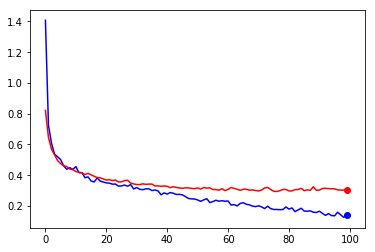

In [216]:
import matplotlib.pyplot as plt

fig = plt.figure()

final_train_counter = []
final_train_losses = []
final_test_counter = []
final_test_losses = []

for i in range(0, n_epochs):
    final_train_counter.append(i)

"""
for i in range(0, len(avg_train_loss)-1, 30):
    index = int(i/10)
    final_train_counter.append(train_counter[i])
    final_train_losses.append((train_losses[i] + train_losses[i+1]) / 2)
    final_test_counter.append(train_counter[i])
    final_test_losses.append((test_losses[i] + test_losses[i+1]) / 2)

final_train_counter.append(train_counter[len(train_counter)-1]) 
final_train_losses.append(train_losses[len(train_counter)-1])
final_test_counter.append(train_counter[len(train_counter)-1])
final_test_losses.append(test_losses[len(train_counter)-1])    
    
plt.plot(len(avg_train_loss), avg_train_loss, color='blue')
plt.scatter(avg_train_loss[-1], avg_train_loss[-1], color='blue')
plt.plot(len(avg_test_losses), avg_test_losses, color='red')
plt.scatter(avg_test_losses[-1], avg_test_losses[-1], color='red')

# print(len(test_counter))
# print(len(test_losses))

plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')
"""

plt.plot(final_train_counter, avg_train_loss, color='blue')
plt.scatter(final_train_counter[-1], avg_train_loss[-1], color='blue')
plt.plot(final_train_counter, avg_test_loss, color='red')
plt.scatter(final_train_counter[-1], avg_test_loss[-1], color='red')
# plt.plot(final_train_counter, test_accuracy_list, color='orange')

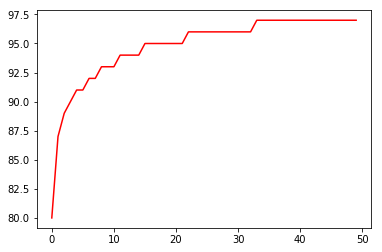

In [200]:
import matplotlib.pyplot as plt

fig = plt.figure()


last_acc = []
last_counter = []
index = 0
for acc in range(0, len(test_accuracy_list)) :
    last_acc.append(test_accuracy_list[acc])
    last_counter.append(final_train_counter[index])
    index = index + 1

plt.plot(last_counter, last_acc, color='red')


In [201]:
import matplotlib.pyplot as plt
import plotter

acc1 = plotter.SavedAccuracy(name='mnist64_adaptive_tabu_acc.pkl')
acc1.saveGraph(last_acc, last_counter)
#a, c = acc1.loadGraph()
#plt.plot(c, a, color='red')


/home/akash/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


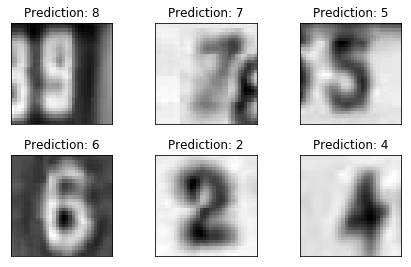

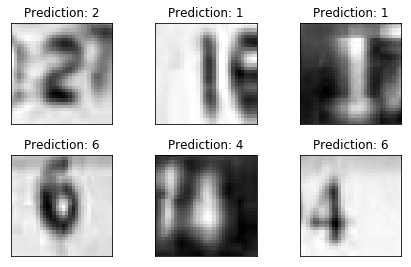

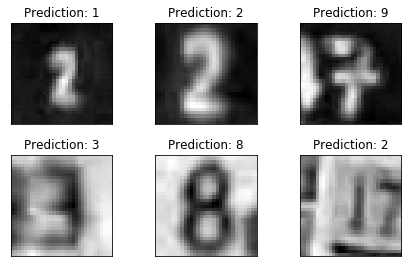

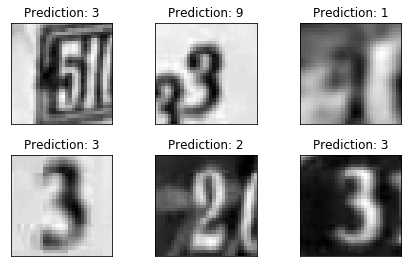

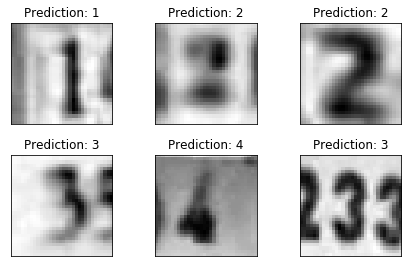

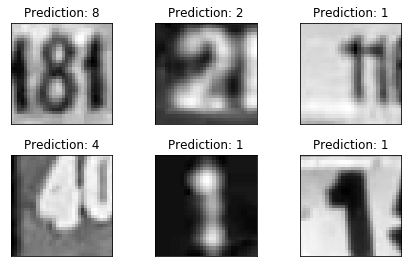

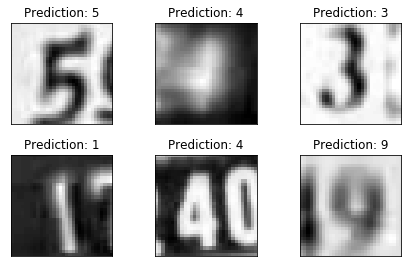

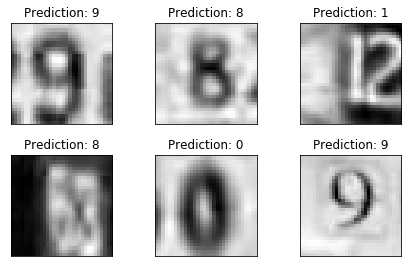

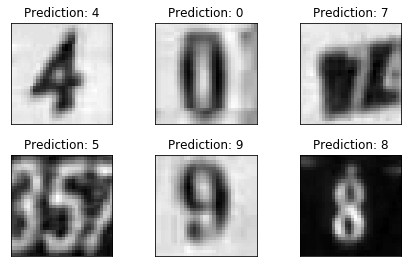

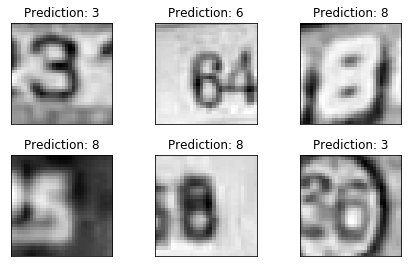

In [87]:
def makeCifar10Dec(param):
    if param == 0:
        return "airplane"
    elif param == 1:
        return "automobile"
    elif param == 2:
        return "bird"
    elif param == 3:
        return "cat"
    elif param == 4:
        return "deer"
    elif param == 5:
        return "dog"
    elif param == 6:
        return "frog"
    elif param == 7:
        return "horse"
    elif param == 8:
        return "ship"
    elif param == 9:
        return "truck"
    

examples = enumerate(test_loader)
for i in range(0, 10):
    batch_idx, (example_data, example_targets) = next(examples)
  
    with torch.no_grad():
        output = network(example_data)

        fig = plt.figure()
        for i in range(6):
            plt.subplot(2,3,i+1)
            plt.tight_layout()
            plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
            plt.title("Prediction: {}".format(
                output.data.max(1, keepdim=True)[1][i].item()))
            plt.xticks([])
            plt.yticks([])


In [221]:
# Reloading a already saved model
'''
import matplotlib.pyplot as plt

continued_network = Net()
continued_optimizer = optim.SGD(continued_network.parameters(), lr=learning_rate,
                                momentum=momentum)

network_state_dict = torch.load('./results/model.pth')
continued_network.load_state_dict(network_state_dict)

optimizer_state_dict = torch.load('./results/optimizer.pth')
continued_optimizer.load_state_dict(optimizer_state_dict)

examples = enumerate(test_loader)
for i in range(0, 2):
    batch_idx, (example_data, example_targets) = next(examples)

    with torch.no_grad():
        output = continued_network(example_data)

        fig = plt.figure()
        for i in range(6):
            plt.subplot(2,3,i+1)
            plt.tight_layout()
            plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
            plt.title("Prediction: {}".format(
                output.data.max(1, keepdim=True)[1][i].item()))
            
            plt.xticks([])
            plt.yticks([])
            
'''

'\nimport matplotlib.pyplot as plt\n\ncontinued_network = Net()\ncontinued_optimizer = optim.SGD(continued_network.parameters(), lr=learning_rate,\n                                momentum=momentum)\n\nnetwork_state_dict = torch.load(\'./results/model.pth\')\ncontinued_network.load_state_dict(network_state_dict)\n\noptimizer_state_dict = torch.load(\'./results/optimizer.pth\')\ncontinued_optimizer.load_state_dict(optimizer_state_dict)\n\nexamples = enumerate(test_loader)\nfor i in range(0, 2):\n    batch_idx, (example_data, example_targets) = next(examples)\n\n    with torch.no_grad():\n        output = continued_network(example_data)\n\n        fig = plt.figure()\n        for i in range(6):\n            plt.subplot(2,3,i+1)\n            plt.tight_layout()\n            plt.imshow(example_data[i][0], cmap=\'gray\', interpolation=\'none\')\n            plt.title("Prediction: {}".format(\n                output.data.max(1, keepdim=True)[1][i].item()))\n            \n            plt.xticks

'\nimport matplotlib.pyplot as plt\n\ncontinued_network = Net()\ncontinued_optimizer = optim.SGD(continued_network.parameters(), lr=learning_rate,\n                                momentum=momentum)\n\nnetwork_state_dict = torch.load(\'./results/model.pth\')\ncontinued_network.load_state_dict(network_state_dict)\n\noptimizer_state_dict = torch.load(\'./results/optimizer.pth\')\ncontinued_optimizer.load_state_dict(optimizer_state_dict)\n\nexamples = enumerate(test_loader)\nfor i in range(0, 2):\n    batch_idx, (example_data, example_targets) = next(examples)\n\n    with torch.no_grad():\n        output = continued_network(example_data)\n\n        fig = plt.figure()\n        for i in range(6):\n            plt.subplot(2,3,i+1)\n            plt.tight_layout()\n            plt.imshow(example_data[i][0], cmap=\'gray\', interpolation=\'none\')\n            plt.title("Prediction: {}".format(\n                output.data.max(1, keepdim=True)[1][i].item()))\n            \n            plt.xticks